<a href="https://colab.research.google.com/github/chaimaaloug/pokemon_back/blob/main/projet_python_pokemon_pierre_version_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, average_precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pokémon/pokemons.csv')
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

types_df = pd.read_csv('/content/drive/MyDrive/Pokémon/pokemon-types.csv')
types_df = types_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

#Exploratory Data Analysis

### **1.1 Overview**

**Dataset des pokemons**

In [ ]:
df

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,a strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"when the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,the plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,none,39,52,43,60,50,65,309,6,85,blaze solar-power,"obviously prefers hot places. when it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,none,58,64,58,80,65,80,405,11,190,blaze solar-power,"when it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1013,sinistcha,ordinary,generation-ix,poltchageist,grass,ghost,71,60,106,121,80,70,508,2,22,hospitality heatproof,not available
1013,1014,okidogi,legendary,generation-ix,nothing,poison,fighting,88,128,115,58,86,80,555,18,922,toxic-chain zero-to-hero,not available
1014,1015,munkidori,legendary,generation-ix,nothing,poison,psychic,88,75,66,130,90,106,555,10,122,toxic-chain frisk,not available
1015,1016,fezandipiti,legendary,generation-ix,nothing,poison,fairy,88,91,82,70,125,99,555,14,301,toxic-chain technician,not available


**Dataset des types de pokemon**

In [ ]:
types_df

,types,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN,NaN,0.5,NaN
1,fire,NaN,0.5,0.5,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,0.5,NaN,0.5,NaN,2.0,NaN
2,water,NaN,2.0,0.5,NaN,0.5,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,0.5,NaN,NaN,NaN
3,electric,NaN,NaN,2.0,0.5,0.5,NaN,NaN,NaN,0.0,2.0,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
4,grass,NaN,0.5,2.0,NaN,0.5,NaN,NaN,0.5,2.0,0.5,NaN,0.5,2.0,NaN,0.5,NaN,0.5,NaN
5,ice,NaN,0.5,0.5,NaN,2.0,0.5,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,0.5,NaN
6,fighting,2.0,NaN,NaN,NaN,NaN,2.0,NaN,0.5,NaN,0.5,0.5,0.5,2.0,0.0,NaN,2.0,2.0,0.5
7,poison,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.5,0.5,NaN,NaN,NaN,0.5,0.5,NaN,NaN,0.0,2.0
8,ground,NaN,2.0,NaN,2.0,0.5,NaN,NaN,2.0,NaN,0.0,NaN,0.5,2.0,NaN,NaN,NaN,2.0,NaN
9,flying,NaN,NaN,NaN,0.5,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,0.5,NaN,NaN,NaN,0.5,NaN


**Dataset des pokemons : infos générals**

In [ ]:
# Vérifier les types de données
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1017 non-null   int64 
 1   name          1017 non-null   object
 2   rank          1017 non-null   object
 3   generation    1017 non-null   object
 4   evolves_from  1017 non-null   object
 5   type1         1017 non-null   object
 6   type2         1017 non-null   object
 7   hp            1017 non-null   int64 
 8   atk           1017 non-null   int64 
 9   def           1017 non-null   int64 
 10  spatk         1017 non-null   int64 
 11  spdef         1017 non-null   int64 
 12  speed         1017 non-null   int64 
 13  total         1017 non-null   int64 
 14  height        1017 non-null   int64 
 15  weight        1017 non-null   int64 
 16  abilities     1017 non-null   object
 17  desc          1017 non-null   object
dtypes: int64(10), object(8)
memory usage: 143.1+ KB


**Dataset des pokemons : description**

In [ ]:
# La fonction 'describe' permet d'obtenir des informations de l'ensemble de données.
df.describe()

,id,hp,atk,def,spatk,spdef,speed,total,height,weight
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,509.000000,69.965585,77.425762,72.215339,69.855457,70.054081,67.060964,426.577188,12.053097,659.910521
std,293.726914,26.598461,29.828754,29.131082,29.557427,26.662701,28.724702,112.432492,12.435152,1198.306370
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,1.000000,1.000000
25%,255.000000,50.000000,55.000000,50.000000,46.000000,50.000000,45.000000,323.000000,5.000000,85.000000
50%,509.000000,67.000000,75.000000,70.000000,65.000000,66.000000,65.000000,450.000000,10.000000,280.000000
75%,763.000000,84.000000,100.000000,90.000000,90.000000,85.000000,88.000000,505.000000,15.000000,682.000000
max,1017.000000,255.000000,181.000000,230.000000,173.000000,230.000000,200.000000,720.000000,200.000000,9999.000000


**Dataset des pokemons : duplication**

In [ ]:
# Vérifier s'il y a des doublons
df.duplicated().sum()

0

**Dataset des pokemons : nombre de pokemon**

In [ ]:
nombre_total_pokemon = df.shape[0]
print(f"Le nombre total de Pokémon dans le dataset est : {nombre_total_pokemon}")

Le nombre total de Pokémon dans le dataset est : 1017


**Dataset des types de pokemon : infos générals**

In [ ]:
# Vérifier les types de données
types_df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   types     18 non-null     object 
 1   normal    2 non-null      float64
 2   fire      9 non-null      float64
 3   water     6 non-null      float64
 4   electric  4 non-null      float64
 5   grass     9 non-null      float64
 6   ice       5 non-null      float64
 7   fighting  6 non-null      float64
 8   poison    7 non-null      float64
 9   ground    6 non-null      float64
 10  flying    7 non-null      float64
 11  psychic   5 non-null      float64
 12  bug       6 non-null      float64
 13  rock      9 non-null      float64
 14  ghost     6 non-null      float64
 15  dragon    7 non-null      float64
 16  dark      6 non-null      float64
 17  steel     14 non-null     float64
 18  fairy     6 non-null      float64
dtypes: float64(18), object(1)
memory usage: 2.8+ KB


**Dataset des types de pokemon : duplication**

In [ ]:
# Vérifier s'il y a des doublons
types_df.duplicated().sum()

0


## **1.2 Missing Values**

In [ ]:
# Compter les valeurs manquantes par colonne
types_df.isnull().sum()

types        0
normal      16
fire         9
water       12
electric    14
grass        9
ice         13
fighting    12
poison      11
ground      12
flying      11
psychic     13
bug         12
rock         9
ghost       12
dragon      11
dark        12
steel        4
fairy       12
dtype: int64

In [ ]:
# Définir la colonne 'types' comme l'index du DataFrame
types_df.set_index('types', inplace=True)

# Quand l'efficacité des types est neutre, leurs valeurs sont "NaN", nous les avons remplacées par une valeur numérique
types_df.fillna(1, inplace=True)

In [ ]:
types_df

,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
types,,,,,,,,,,,,,,,,,,
normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
fire,1.0,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
water,1.0,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
electric,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
grass,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
ice,1.0,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
fighting,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
poison,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
ground,1.0,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0


## **1.3 Visualisation**

**Relation entre Taille et Poids des Pokémon**

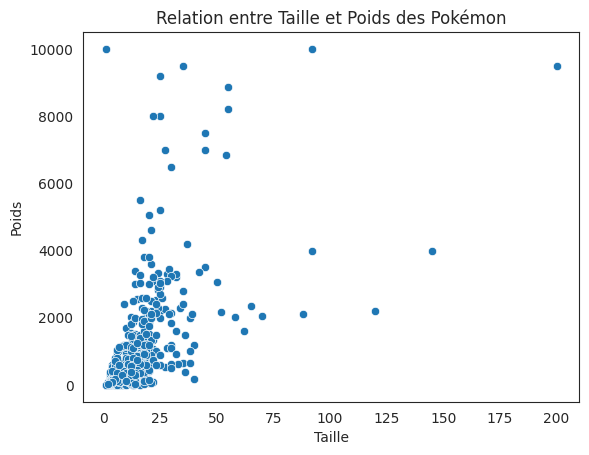

In [ ]:
# Relation entre Taille et Poids des Pokémon
sns.scatterplot(data=df, x='height', y='weight')
plt.title('Relation entre Taille et Poids des Pokémon')
plt.xlabel('Taille')
plt.ylabel('Poids')
plt.show()

**Relation entre Défense et Special Défense**

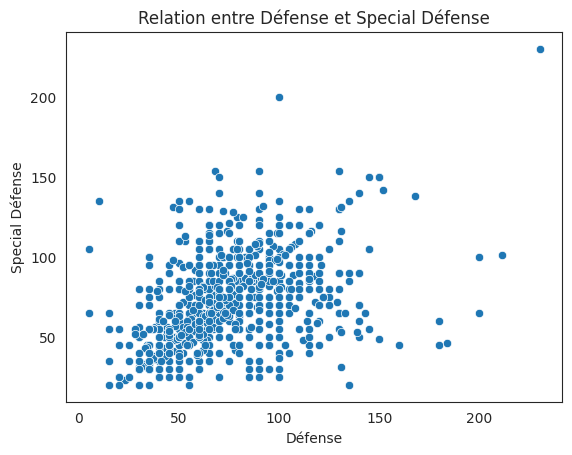

In [ ]:
sns.scatterplot(data=df, x='def', y='spdef')
plt.title('Relation entre Défense et Special Défense')
plt.xlabel('Défense')
plt.ylabel('Special Défense')
plt.show()

**Relation entre Attaque et Special Attaque**

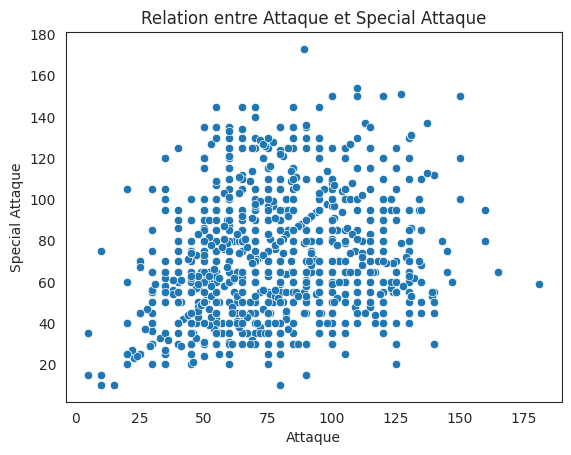

In [ ]:
sns.scatterplot(data=df, x='atk', y='spatk')
plt.title('Relation entre Attaque et Special Attaque')
plt.xlabel('Attaque')
plt.ylabel('Special Attaque')
plt.show()

**Relation entre Attaque et Defense**

<ipython-input-106-063534b3b2c7>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.scatterplot(x=X, y=Y, data=df,


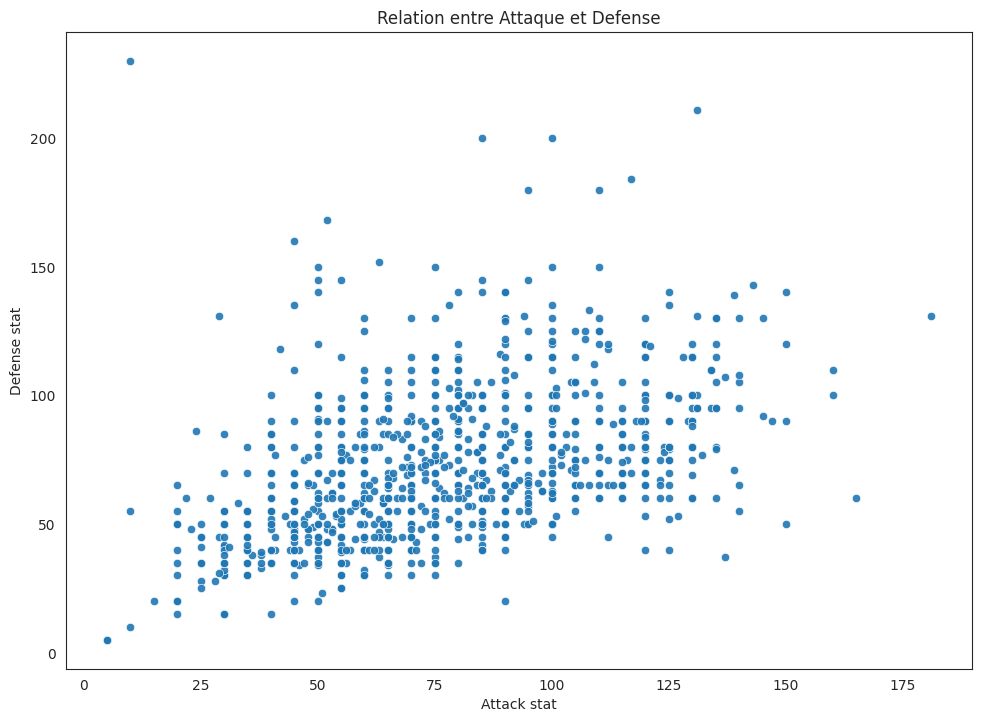

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set_style("white")
X=df['atk']
Y=df['def']
ax = sns.scatterplot(x=X, y=Y, data=df,
                     alpha=.9, palette="muted")
ax.set(xlabel='Attack stat', ylabel='Defense stat')
plt.title('Relation entre Attaque et Defense')
plt.show()

**Répartition du Nombre de Pokémon par Génération**

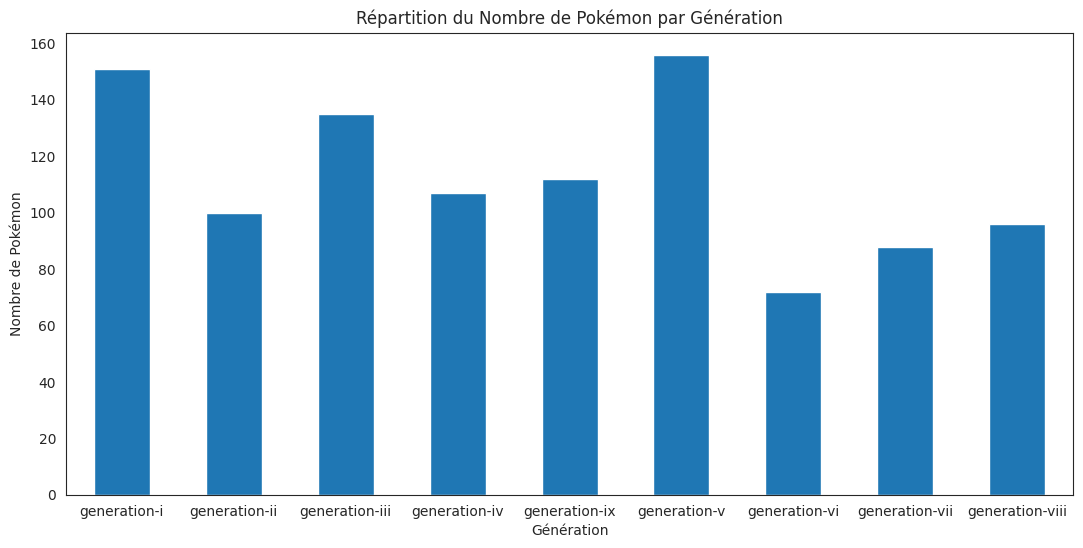

In [ ]:
generation_counts = df['generation'].value_counts().sort_index()

plt.figure(figsize=(13, 6))
generation_counts.plot(kind='bar')
plt.title('Répartition du Nombre de Pokémon par Génération')
plt.xlabel('Génération')
plt.ylabel('Nombre de Pokémon')
plt.xticks(rotation=0)
plt.show()


**Nombre de pokemon par type primaire**

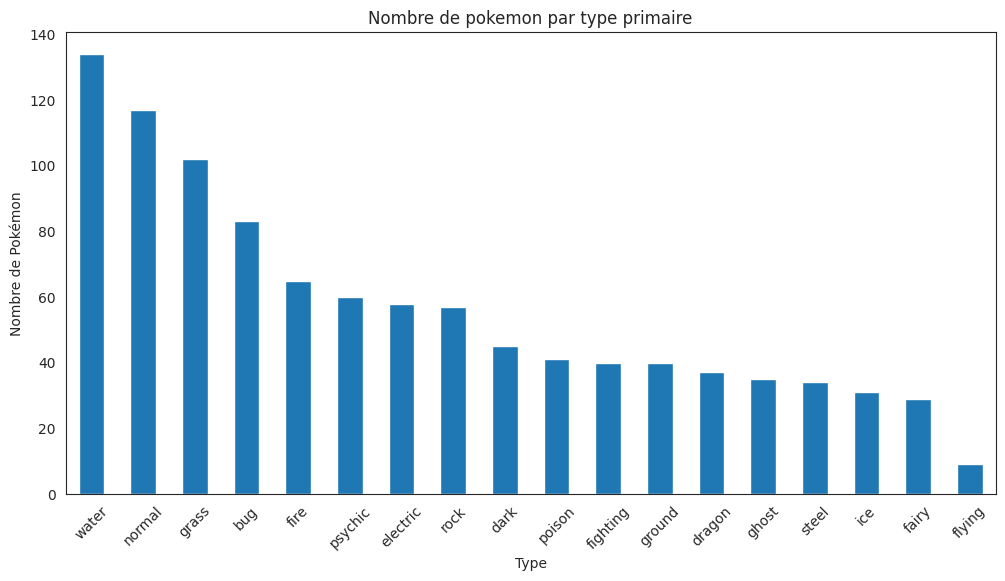

In [ ]:
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Nombre de pokemon par type primaire')
plt.xlabel('Type')
plt.ylabel('Nombre de Pokémon')
plt.xticks(rotation=45)
plt.show()

**Moyenne des Statistiques par Type de Pokémon**

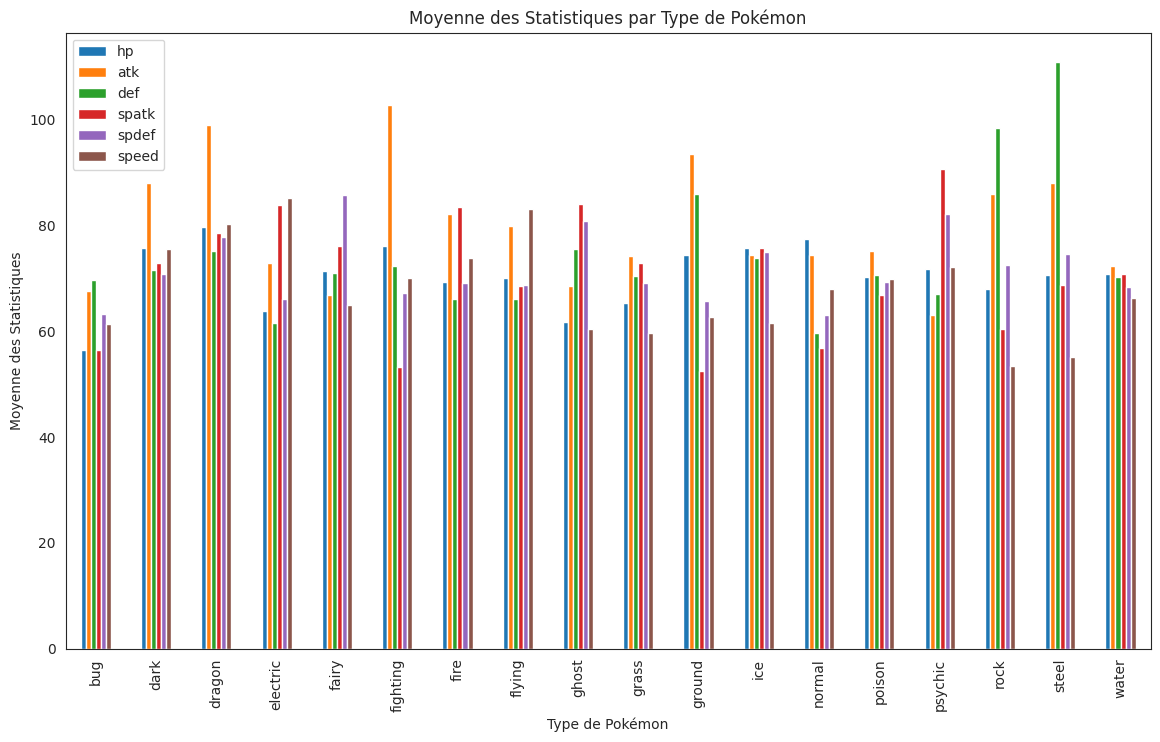

In [ ]:
mean_stats_by_type = df.groupby('type1')[['hp', 'atk', 'def', 'spatk', 'spdef', 'speed']].mean()

# Affichage des moyennes sous forme de graphique
mean_stats_by_type.plot(kind='bar', figsize=(14, 8))
plt.title('Moyenne des Statistiques par Type de Pokémon')
plt.ylabel('Moyenne des Statistiques')
plt.xlabel('Type de Pokémon')
plt.show()

**Comparaison entre Rangs et Statistiques des Pokémon**

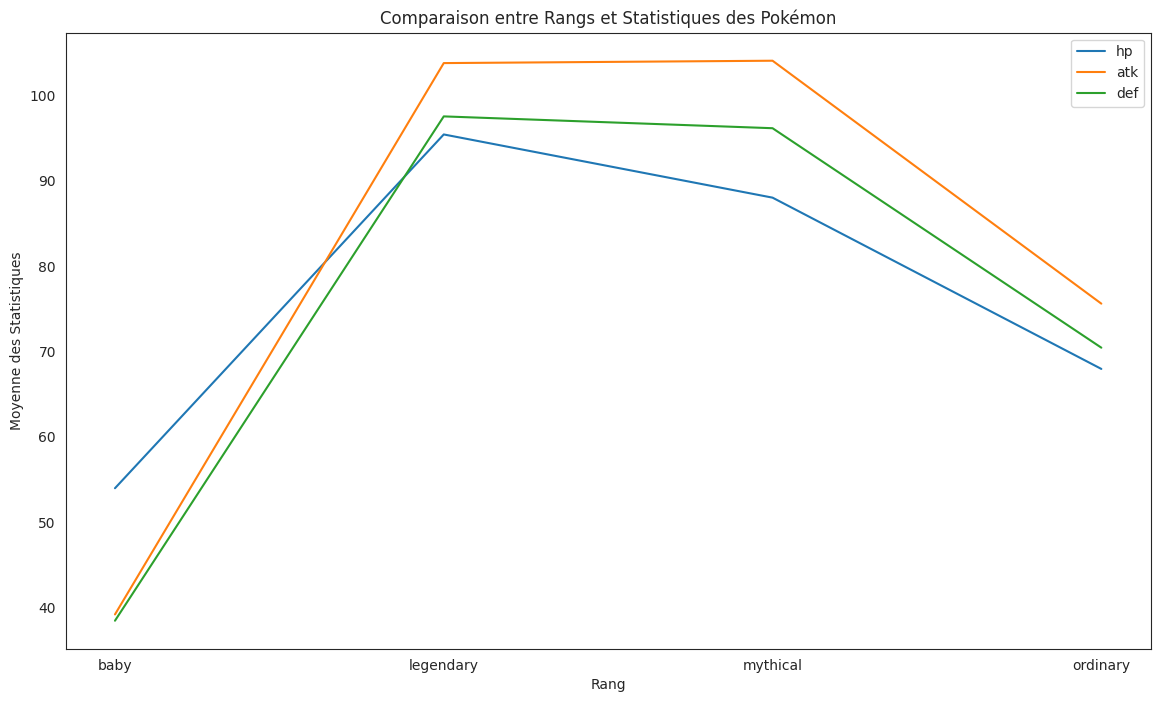

In [ ]:
rank_comparison = df.groupby('rank')[['hp', 'atk', 'def']].mean()

# Affichage sous forme de graphique
rank_comparison.plot(kind='line', figsize=(14, 8))
plt.title('Comparaison entre Rangs et Statistiques des Pokémon')
plt.ylabel('Moyenne des Statistiques')
plt.xlabel('Rang')
plt.show()


**Matrice de l\'efficacité des types de Pokémon**

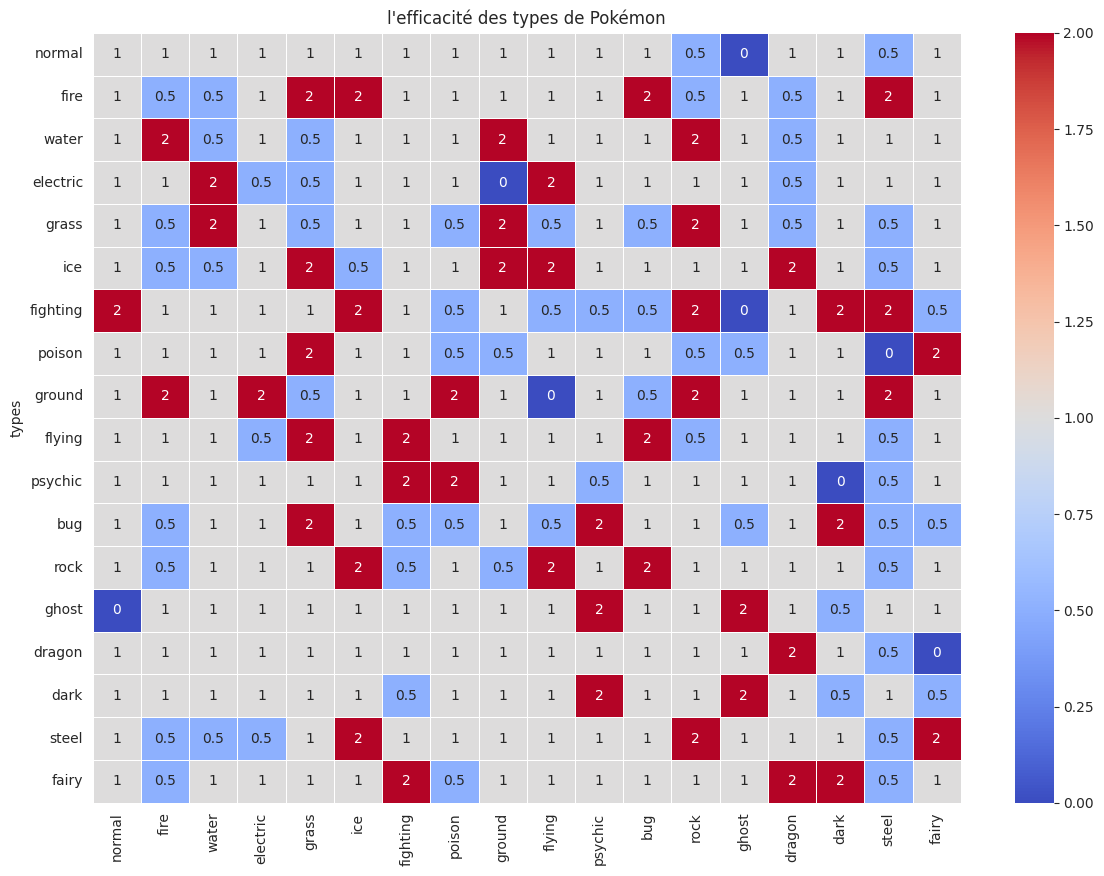

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(types_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('l\'efficacité des types de Pokémon')
plt.show()

## **1.4 Target Distribution**

**Nombres d'aptitudes**

In [ ]:
unique_abilities_count = df['abilities'].nunique()
unique_abilities_count

617

**Distribution des Aptitudes**

In [ ]:
abilities_count = df['abilities'].value_counts()

abilities_count.plot(kind='bar', figsize=(617, 20))
plt.title('Distribution des Aptitudes des Pokémon')
plt.ylabel('Nombre de Pokémon')
plt.xlabel('Aptitude')
plt.show()


**Répartition du Nombre de Pokémon par Génération**

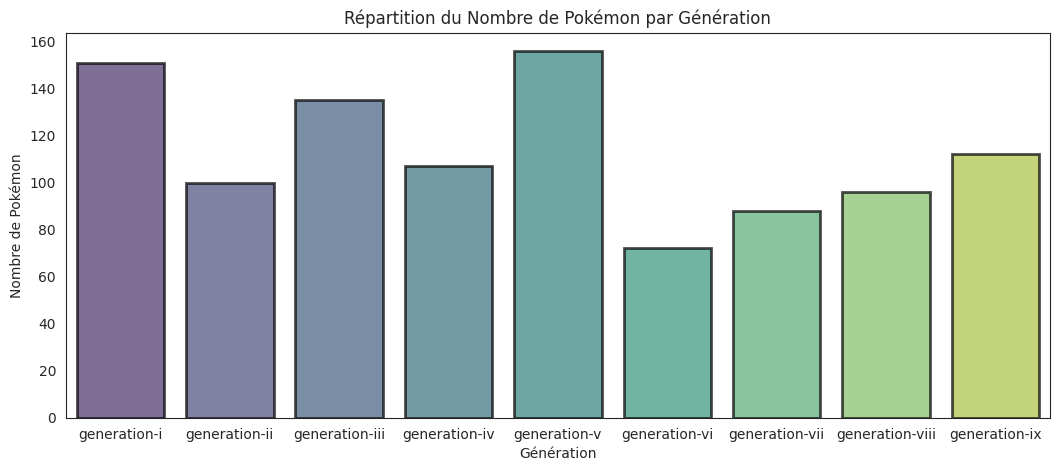

In [ ]:
fig, ax = plt.subplots(figsize=(12.7, 5))


sns.countplot(x="generation", data=df, hue="generation", palette="viridis", alpha=0.7, edgecolor="0", linewidth=2, saturation=0.7, width=0.8, ax=ax, legend=False)
ax.set(xlabel='Génération', ylabel='Nombre de Pokémon', title='Répartition du Nombre de Pokémon par Génération')
plt.show()

## **1.5 Correlations**

*   Analyser les corrélations fortes
*   Créer une Heatmap des corrélations

<Axes: >

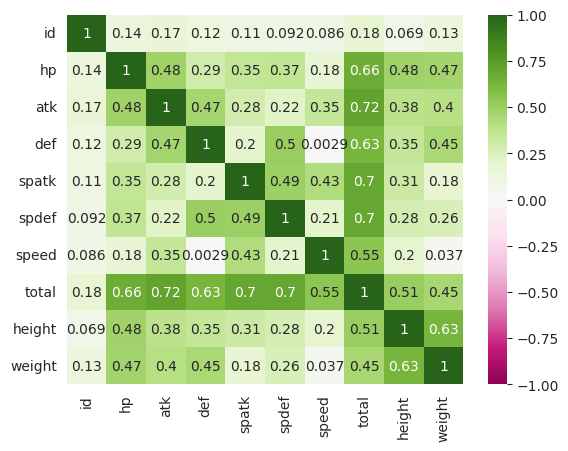

In [ ]:
sns.heatmap(df.corr(numeric_only = True), vmin = -1, vmax = 1, annot=True,cmap= "PiYG")

## **1.5 Model**

**Efficacité d'un type contre un autre**

In [ ]:
def comparer_types(type1, type2, types_df):
    type1 = type1.lower()
    type2 = type2.lower()

    efficacite_type1_contre_type2 = types_df.loc[types_df.index == type1, type2].values[0]
    efficacite_type2_contre_type1 = types_df.loc[types_df.index == type2, type1].values[0]

    # Afficher les efficacités
    print(f"Efficacité de {type1.capitalize()} contre {type2.capitalize()}: {efficacite_type1_contre_type2}")
    print(f"Efficacité de {type2.capitalize()} contre {type1.capitalize()}: {efficacite_type2_contre_type1}")

    # Déterminer lequel est potentiellement plus fort
    if efficacite_type1_contre_type2 > efficacite_type2_contre_type1:
        print(f"{type1.capitalize()} a un avantage théorique sur {type2.capitalize()}")
    elif efficacite_type1_contre_type2 < efficacite_type2_contre_type1:
        print(f"{type2.capitalize()} a un avantage théorique sur {type1.capitalize()}")
    else:
        print(f"{type1.capitalize()} et {type2.capitalize()} sont potentiellement équilibrés")

# Test
comparer_types('Water', 'Electric', types_df)

Efficacité de Water contre Electric: 1.0
Efficacité de Electric contre Water: 2.0
Electric a un avantage théorique sur Water


**Comparatif entre les deux pokemons sur les types**

In [ ]:
def comparer_pokemon_double_type(nom_pokemon1, nom_pokemon2, df, types_df):
    # obtenir les types des pokemons
    types_pokemon1 = df.loc[df['name'].str.lower() == nom_pokemon1.lower(), ['type1', 'type2']].values.flatten()
    types_pokemon1 = [t.lower() for t in types_pokemon1 if pd.notnull(t) and t.lower() != 'none']

    types_pokemon2 = df.loc[df['name'].str.lower() == nom_pokemon2.lower(), ['type1', 'type2']].values.flatten()
    types_pokemon2 = [t.lower() for t in types_pokemon2 if pd.notnull(t) and t.lower() != 'none']

    # Par prudence, mise en lowercase des types
    types_df.columns = types_df.columns.str.lower()
    types_df.index = types_df.index.str.lower()

    # Par prudence, remplacement des NaN par 1
    types_df.fillna(1, inplace=True)

    # Initialisation
    efficacite_pokemon1, efficacite_pokemon2 = 1, 1

    # Debug: Print des types de chaque pokemons
    print(f"Types for {nom_pokemon1}: {types_pokemon1}")
    print(f"Types for {nom_pokemon2}: {types_pokemon2}")

    # Calcul de l'efficacité des types du premier pokemon contre les types du deuxieme
    for type1 in types_pokemon1:
        for type2 in types_pokemon2:
            efficacite = types_df.at[type1, type2] if type2 in types_df.columns else 1
            efficacite_pokemon1 *= efficacite

            # Debug: Print de l'efficacité
            print(f"Effectiveness of {type1} against {type2} (Pokémon 1 vs Pokémon 2): {efficacite}")

    # Calcul de l'efficacité des types du deuxieme pokemon contre les types du premier
    for type2 in types_pokemon2:
        for type1 in types_pokemon1:
            efficacite = types_df.at[type2, type1] if type1 in types_df.columns else 1
            efficacite_pokemon2 *= efficacite

            # Debug: Print de l'efficacité
            print(f"Effectiveness of {type2} against {type1} (Pokémon 2 vs Pokémon 1): {efficacite}")

    # Debug: Print du total des efficacités
    print(f"Total effectiveness for {nom_pokemon1} against {nom_pokemon2}: {efficacite_pokemon1}")
    print(f"Total effectiveness for {nom_pokemon2} against {nom_pokemon1}: {efficacite_pokemon2}")

    # Determination de quel pokemon a l'avantage
    if efficacite_pokemon1 > efficacite_pokemon2:
        print(f"{nom_pokemon1.capitalize()} has an advantage over {nom_pokemon2.capitalize()}.")
    elif efficacite_pokemon1 < efficacite_pokemon2:
        print(f"{nom_pokemon2.capitalize()} has an advantage over {nom_pokemon1.capitalize()}.")
    else:
        print(f"{nom_pokemon1.capitalize()} and {nom_pokemon2.capitalize()} are equally matched.")

# Test
comparer_pokemon_double_type('swampert', 'raikou', df, types_df)
# comparer_pokemon_double_type('blastoise', 'raikou', df, types_df)
# comparer_pokemon_double_type('dialga', 'tyranitar', df, types_df)


Types for swampert: ['water', 'ground']
Types for raikou: ['electric']
Effectiveness of water against electric (Pokémon 1 vs Pokémon 2): 1.0
Effectiveness of ground against electric (Pokémon 1 vs Pokémon 2): 2.0
Effectiveness of electric against water (Pokémon 2 vs Pokémon 1): 2.0
Effectiveness of electric against ground (Pokémon 2 vs Pokémon 1): 0.0
Total effectiveness for swampert against raikou: 2.0
Total effectiveness for raikou against swampert: 0.0
Swampert has an advantage over Raikou.


**Comparatif de deux pokémons sur leurs bases stats globales**

In [ ]:
# Comparatif de deux pokémon sur la base stats globale
def comparer_pokemons(nom_pokemon1, nom_pokemon2):
    # Convertir les noms de Pokémon en minuscules
    nom_pokemon1 = nom_pokemon1.lower()
    nom_pokemon2 = nom_pokemon2.lower()

    # Sélection des données des deux Pokémon
    pokemon1_data = df[df['name'] == nom_pokemon1]
    pokemon2_data = df[df['name'] == nom_pokemon2]

    if not pokemon1_data.empty and not pokemon2_data.empty:
        # Extraire les caractéristiques pertinentes pour la comparaison
        types_pokemon1 = pokemon1_data.iloc[0]['type1'].lower()
        types_pokemon2 = pokemon2_data.iloc[0]['type1'].lower()
        total_pokemon1 = pokemon1_data.iloc[0]['total']
        total_pokemon2 = pokemon2_data.iloc[0]['total']

        # Afficher les caractéristiques des deux Pokémon
        print(f"{nom_pokemon1}: Type({types_pokemon1}), Total({total_pokemon1})")
        print(f"{nom_pokemon2}: Type({types_pokemon2}), Total({total_pokemon2})")

        # Comparaison des caractéristiques
        if total_pokemon1 > total_pokemon2:
            print(f"{nom_pokemon1} est potentiellement plus fort que {nom_pokemon2}")
        elif total_pokemon1 < total_pokemon2:
            print(f"{nom_pokemon2} est potentiellement plus fort que {nom_pokemon1}")
        else:
            print(f"{nom_pokemon1} et {nom_pokemon2} sont potentiellement égaux en termes de force")
    else:
        print(f"Données pour {nom_pokemon1} ou {nom_pokemon2} introuvables. Vérifiez les noms des Pokémon.")

# Exemple d'utilisation
comparer_pokemons('mewtwo', 'arceus')




mewtwo: Type(psychic), Total(680)
arceus: Type(normal), Total(720)
arceus est potentiellement plus fort que mewtwo
